In [1]:
import serial
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, rfft
import numpy as np
%matplotlib inline

# plt.rcParams["figure.figsize"] = (32,3)

In [108]:
ser = serial.Serial('/dev/ttyACM1', 9600)
# ser = serial.Serial('/dev/ttyUSB0', 9600)

x = []
y = []
N = 1000
count = 0
# plt.stem(x, y, use_line_collection=True)

  # valor_Corrente = maior_Valor * 0.004882812;
  # valor_Corrente = valor_Corrente - 2.47;
  # valor_Corrente = valor_Corrente * 1000;
  # valor_Corrente = valor_Corrente / 185;         #sensibilidade : 66mV/A para ACS712 30A / 185mV/A para ACS712 5A
  # valor_Corrente = valor_Corrente / 1.41421356;
while count < N:
    cc=str(ser.readline())
    newCC = cc[2:][:-5]

    ccSplited = newCC.split(';')
    y.append(float(ccSplited[0]))
    x.append(float(ccSplited[1]) / 10000000)
    # print(count)
    # print(float(ccSplited[0]))
    count = count + 1

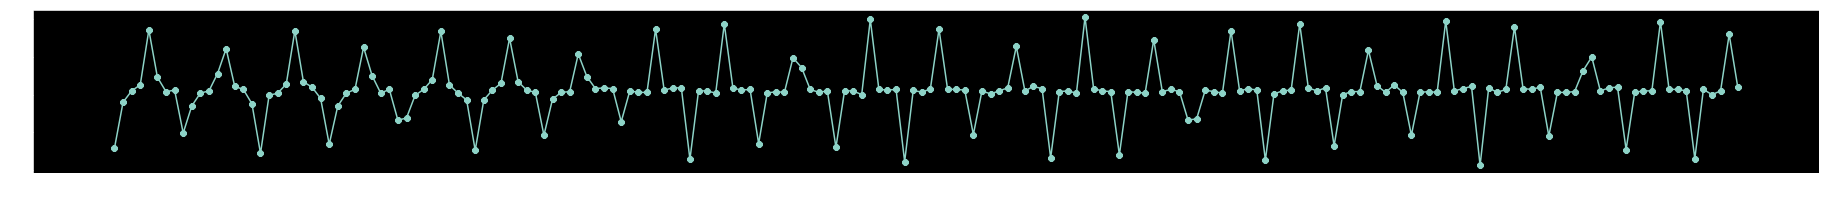

In [104]:
# plt.stem(x, y, use_line_collection=True)
# print(y[200:])
plt.rcParams["figure.figsize"] = (32,3)
plt.plot(x[10:200], y[10:200],  '8-')
plt.show()

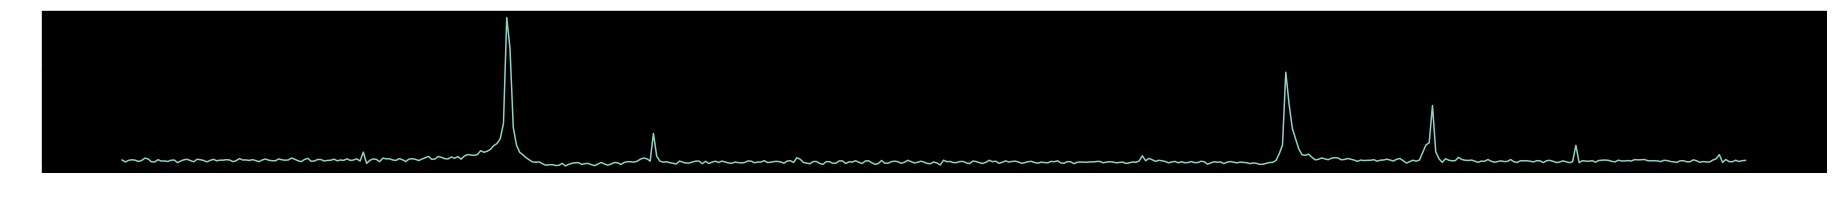

In [107]:
T = 1/8620
yf = fft(y)
xf = fftfreq(N, T)
mascara = xf > 0
xfAbs = 2.0 * np.abs(yf/N)
plt.plot(xf[mascara], xfAbs[mascara])
plt.ylabel("Amplitude")
plt.xlabel("Frequência (Hz)")
plt.show()

In [2]:
a = 10 + 5j
b = 15 + 8j

In [3]:
a + b


(25+13j)